# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 30th, 2025 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. You should provide solutions to the exercises with the following titles from **Part 1** 

* *Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook*

* *WS edition*

And from **Part 2**

* *BA Edition*.
  * **Note**: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network. 


## Part 1

> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

### Answers

1. The biggest problem with random networks as a model for real-world networks is that they cannot reproduce the degree distribution. Specifically, the chapter points out that in a large random network, the degrees of most nodes are concentrated in a narrow range around the average degree, ⟨k⟩. This means that random networks do not contain hub-nodes with a high number of connections or have very few nodes with a low number of connections.

2. The chapter outlines four distinct topological regimes for a random network, as a function of its average degree, ⟨k⟩:

    * 2a. Subcritical Regime (0<⟨k⟩<1): The network consists of many small isolated components. The largest component's size is negligible compared to the size of the network.

    * 2b. Critical Point (⟨k⟩=1): This is the phase transition point where a giant component begins to emerge. The largest component's size increases significantly, but it still contains a vanishing fraction of the total nodes.

    * 2c. Supercritical Regime (⟨k⟩>1): a giant component coexists with multiple smalller isolated components. A finite fraction of the nodes are absorbed into the giant component, which grows as ⟨k⟩ increases.

    * 2d. Connected Regime (⟨k⟩>lnN): The giant component has absorbed almost all other components, and the network becomes fully connected, meaning there are no isolated nodes or clusters.

3. According to the textbook, it is a problem for random networks as a model for real-world networks that the degree-dependent clustering C(k) is independent of k. This is because the model predicts that the local clustering coefficient of a node, Ci, is constant for all nodes and is equal to the connection probability p.
However, in real-world networks, the local clustering coefficient systematically decreases as the degree k increases. This means that low-degree nodes are part of tightly knit, clustered communities, while high-degree nodes (hubs) are not. The random network model fails to capture this fundamental property. As stated in the chapter, "it fails to explain... why high-degree nodes have a smaller clustering coefficient than low-degree nodes."

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

p = 0: Average shortest path length = 62.88
p = 0.1: Average shortest path length = 7.49
p = 1: Average shortest path length = 4.76


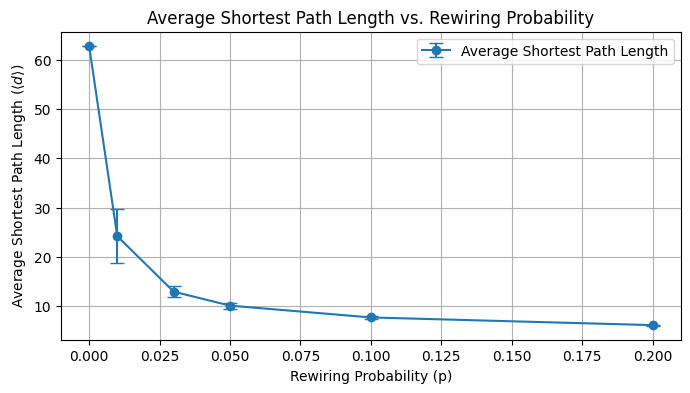

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define graph parameters
n = 500  # number of nodes
k = 4    # average degree
p_values = [0, 0.1, 1] # p values we use

for p in p_values:

    G = nx.connected_watts_strogatz_graph(n, k, p, tries=100)
    
    # Calculate the average shortest path length
    avg_d = nx.average_shortest_path_length(G)
    
    # Print the results
    print(f"p = {p}: Average shortest path length = {avg_d:.2f}")


'''
When the rewiring probability p = 1, the Watts-Strogatz model generates a purely random network (an Erdős-Rényi network).

The average shortest path length for a Watts-Strogatz graph drops dramatically with just a small amount of rewiring. 
The value of p for which d gets close to the path length of a fully randomized network is a small fraction of one, 
typically somewhere in the range of 0.05<p<0.2.

'''

# parameters
N = 500  # nodes
k = 4    # avg degree
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]  # probabilities
num_networks = 50 

# store results
avg_d_means = []
avg_d_stds = []

for p in p_values:
    d_list = []
    
    # get multiple networks for each p
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(N, k, p)
        
        # check for connectivity before getting path length
        if nx.is_connected(G):
            d = nx.average_shortest_path_length(G)
            d_list.append(d)
        else:
            # skip disconnected graphs
            continue
            
    # calculate mean and std for the current p value
    if d_list:
        avg_d_means.append(np.mean(d_list))
        avg_d_stds.append(np.std(d_list))
    else:
        # warning for very low p values where graphs are not connected
        print(f"Warning: No connected graphs were generated for p = {p}")
        avg_d_means.append(np.nan)
        avg_d_stds.append(np.nan)

# plot
plt.figure(figsize=(8, 4))
plt.errorbar(p_values, avg_d_means, yerr=avg_d_stds, fmt='o-', capsize=5, label='Average Shortest Path Length')
plt.title('Average Shortest Path Length vs. Rewiring Probability')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length ($\\langle d \\rangle$)')
plt.grid(True)
plt.legend()
plt.savefig('watts_strogatz_path_length.png')

plt.show()

Figure 1: Average Shortest Path Length vs. Rewiring Probability in Watts-Strogatz Networks. 

The plot shows the average shortest path length d as a function of the rewiring probability p for networks with N=500 nodes and an average degree ⟨k⟩=4. Each data point represents the mean of 50 independently generated networks, with error bars to represent standard deviation. We see a rapid decrease in d from the high value of a regular lattice (p=0) to the low value of a random network. This demonstrates the small-world effect: even a small number of random long-range links can dramatically reduce the average path length of a network. The steepest drop occurs in the range 0<p<0.05, showing that very little randomness is needed to achieve a small-world network topology.

## Part 2

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.


### Answers

...

> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (*remember last week's exercise*), and as always, it's OK to ask your LLM for help with the styling. 
</div>

# Assignment 1.2: Stats and visualization of the Rock Music Network

This second part requires you to have built the network of Rock Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Explain your process in words*

* *Simple network statistics and analysis*.

  * **Note related to this and the following exercise**. It is nice to have the dataset underlying the statistics and visualization available when we grade. Therefore, I recommend that you create a small *network dataset*, which is simply your graph stored in some format that you like (since it's only a few hundred nodes and a few thousand edges, it won't take up a lot of space). You can then place that network one of your group members' GitHub account (or some other server that's available online) and have your Jupyter Notebook fetch that dataset when it runs. (It's OK to use an LLM for help with setting this up, if it seems difficult). 

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.